<u>Linear Programming</u> is widely used in the field of optimization. Many practical problems can be represented by using linear programming.
It is a special case of mathematical optimization. We use the methods of linear programming to achieve the best solutions in a mathematical model whose
requirements are represented by linear relationships.<br>
In this type of optimization, there exists a linear objective function and linear equality and/or inequality constraints.
The constraints make a feasible region, and we are trying to find the best point in the feasible region.

<U>Example:</U><br>
We consider the following minimization problem:
\begin{alignat*}{2}
    \text{minimize}   \quad & 5x + 4y \\
    \text{subject to} \\
    & x + y   &\geq 8 \\
    & 2x + y  &\geq 10 \\
    & x + 4y  &\geq 11 \\
    & x       &\geq 0 \\
    & \quad \quad y       &\geq 0 
\end{alignat*}

First of all, we will visualize the program graphically:

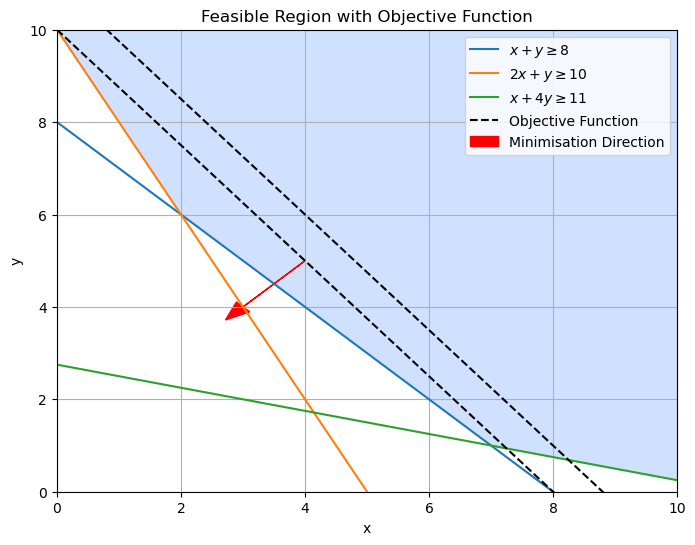

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# create a grid for x and y
x = np.linspace(0, 10, 400)
y = np.linspace(0, 10, 400)
X, Y = np.meshgrid(x, y)

# constraints
c1 = X + Y >= 8
c2 = 2*X + Y >= 10
c3 = X + 4*Y >= 11
c4 = X >= 0
c5 = Y >= 0

# feasible region
feasible_region = c1 & c2 & c3 & c4 & c5

# plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, feasible_region, levels=[0.5, 1], colors=['#a0c4ff'], alpha=0.5)

# constraints as lines
plt.plot(x, 8 - x, label=r'$x + y \geq 8$')
plt.plot(x, 10 - 2*x, label=r'$2x + y \geq 10$')
plt.plot(x, (11 - x)/4, label=r'$x + 4y \geq 11$')

# objective function values for different levels (z = 5*x + 4*y = c )
values = [40, 44]
for i, c in enumerate(values):
    y = (c - 5*x)/4
    if i == 0:
        plt.plot(x, y, linestyle='dashed', label='Objective Function', color='black')
    else:
        plt.plot(x, y, linestyle='dashed', label='_nolegend_', color='black')
x_arrow = 4
y_arrow = (values[0] - 5*x_arrow)/4
dx = -1  # x-Richtung
dy = -1  # y-Richtung
plt.arrow(x_arrow, y_arrow, dx, dy, head_width=0.3, head_length=0.4, fc='red', ec='red', label='Minimisation Direction')        

# axes and area
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region with Objective Function')
plt.legend()
plt.grid(True)
plt.show()

### Solving of the Problem using Gurobipy

In [38]:
from gurobipy import *

# create the model
model = Model(name='linear program')

# add variables
x = model.addVar(name = 'x', vtype = GRB.CONTINUOUS, lb = 0, ub = float('inf'))
y = model.addVar(name = 'y', vtype = GRB.CONTINUOUS, lb = 0, ub = float('inf'))

# set the objective function
model.setObjective(5*x + 4*y, GRB.MINIMIZE)

# add constraints
c1 = model.addConstr(x + y >= 8, name = 'c1')
c2 = model.addConstr(2*x + y >= 10, name = 'c2')
c3 = model.addConstr(x + 4*y >= 11, name = 'c3')

# solve the model
model.optimize()
#model.write('linear_model.lp')  write the model to a file

# output the results
print('-------------------------------------------------------------------------')
print('Objective Function: %f' % model.objVal)

# get values of the decision variables
for v in model.getVars():
    print('%s: %g' % (v.varName, v.x))

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x6c7cdc94
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [4e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 1e+01]
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.850000e+01   0.000000e+00      0s
       2    3.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.400000000e+01
-------------------------------------------------------------------------
Objective Function: 34.000000
x: 2
y: 6
